In [2]:

import matplotlib
%matplotlib widget
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import os
import numpy as np
import pandas as pd
from phasepickers.parker_cfs import src_rec_dist
from datetime import datetime as datetime
from scipy.spatial.distance import cdist
from scipy import signal
from scipy.fft import fft,fftshift
import pickle
import pywt 

In [3]:
os.chdir('/home/spri902/EGS_Collab/4850/results/maystim/processed_CASSM/single_src_rec_gathers/src11_PSThyds_accs/')
OThydata = np.load('PST11data.npy')

In [25]:
dat=OThydata[:,:,16].T

fs=48000
time = np.r_[0:dat.shape[0]]*(1/fs)
# dat= dat[:,0]

In [ ]:

ff = []
tf = []
Sxx = []

for i in range(dat.shape[1]):
    f, t, S = signal.spectrogram(dat[:,i], fs)
    tf.append(t)
    Sxx.append(S)

tfinal = np.cumsum(tf)
Sn = np.hstack(Sxx[:])

In [ ]:
fig,ax = plt.subplots()
vm = np.percentile(Sn,99)
ax.pcolormesh(tfinal,f,Sn, vmin=-vm,vmax=vm,shading='gouraud')
ax.set_ylim(5000,10000)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

In [ ]:
def plot_wavelet(ax, time,fs, signal, scales=None, waveletname = 'cmor', 
                 cmap =plt.cm.seismic, title = 'CASSM CWT', ylabel = 'Period', xlabel = 'Time'):
    dt=1/fs
    W,sj,freqs,coi,fft,fftfreqs = pywt.cwt(signal, dt)

    power = (np.abs(W)) ** 2
    fftpower = np.abs(fft) ** 2
    period = 1/freqs
    levels = [0.015625,0.03125,0.0625, 0.125, 0.25, 0.5, 1]
    contourlevels = np.log2(levels) #original
    time=range(2048)

    im = ax.contourf(time, np.log2(period), np.log2(power), contourlevels, extend='both',cmap=cmap)


    ax.set_title(title, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=18)
    ax.set_xlabel(xlabel, fontsize=18)
    yticks = 2**np.arange(np.ceil(np.log2(period.min())), np.ceil(np.log2(period.max())))    
    ax.set_yticks(np.log2(yticks)) #original
    ax.set_yticklabels(yticks) #original
    ax.invert_yaxis()
    ylim = ax.get_ylim()

    cbar_ax = fig.add_axes([0.95, 0.5, 0.03, 0.25])
    fig.colorbar(im, cax=cbar_ax, orientation="vertical")

In [63]:
wavelet='cmor1.6-1.0'

# scales = np.arange(0.001,0.005,10)
dt=1/fs
# [cfs,freqs] = pywt.cwt(dat,scales,wavelet,dt)
# power = (abs(cfs)) ** 2
# period = 1. / freqs

# levels = [1, 2, 4 , 8 , 16, 32, 64,128, 256]
f = pywt.scale2frequency('cmor1.5-1.0',12)/dt

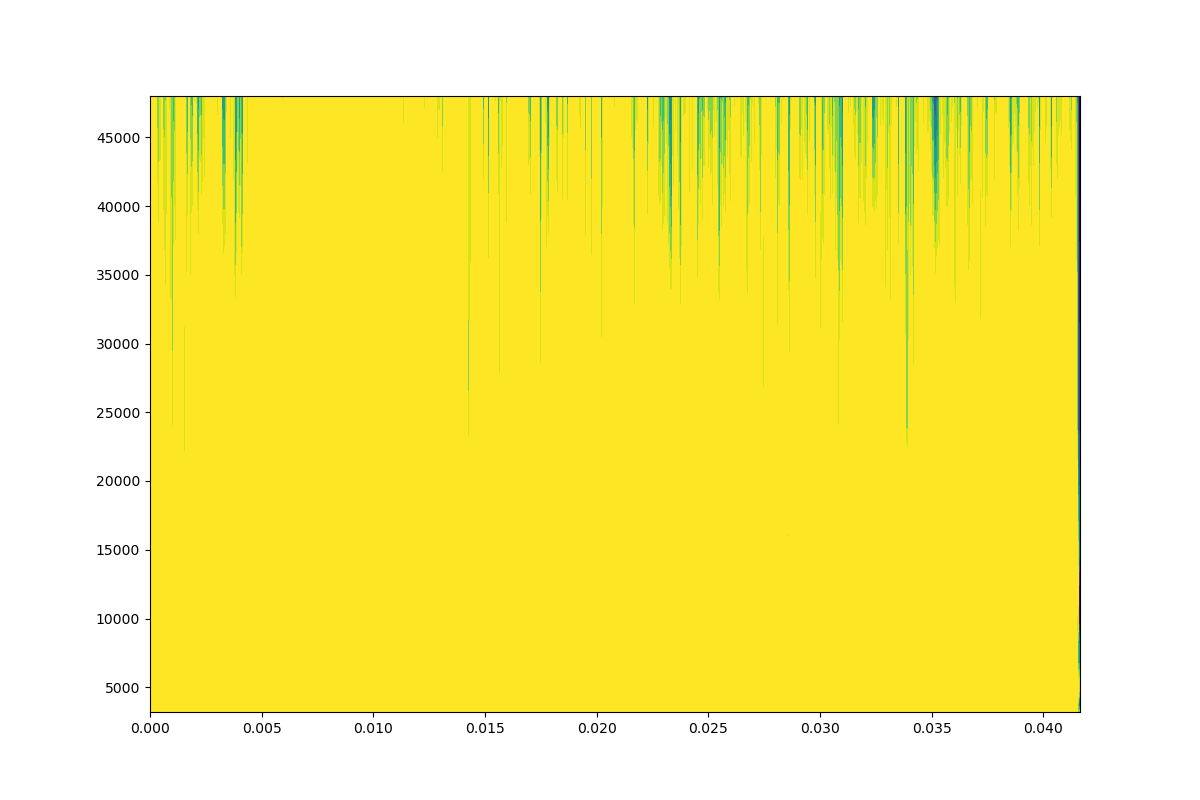

In [58]:
fig,ax = plt.subplots(figsize = (12,8))
ax.contourf(time,freqs, np.log2(power[:,:,535]), np.log2(levels),
            extend='both')
plt.show()